In [35]:
from data import DataXRF

from numpy import arange,linspace
from matplotlib.pyplot import plot,subplots,xlim,ylim,hlines,vlines

In [7]:
data = DataXRF()

In [8]:
path = '/home/zdenek/Projects/pyMaXRDXRF/Oslo/Calibration1/M0795/CappelloGialloXRF/'
data.calibrate_from_file('calibration.ini')

In [9]:
data.calibration.fce

<function data.DataXRF.fce_calibration(x, a, b, c)>

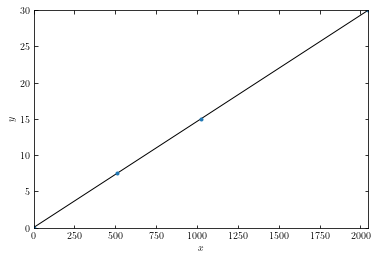

In [10]:
data.calibration.plot()

In [11]:
data.read(path)

Reading XRF data
Done


In [13]:
data.save_h5()

Saving: /home/zdenek/Projects/pyMaXRDXRF/Oslo/Calibration1/M0795/CappelloGialloXRF//data.h5


In [14]:
data.load_h5(path + 'data.h5')

Loading: /home/zdenek/Projects/pyMaXRDXRF/Oslo/Calibration1/M0795/CappelloGialloXRF/data.h5


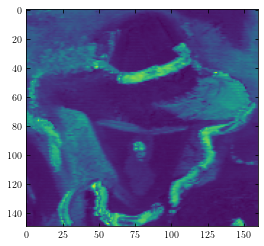

In [15]:
from matplotlib.pyplot import imshow
imshow(data.data.sum(-1)[::-1])

Text(0, 0.5, 'counts')

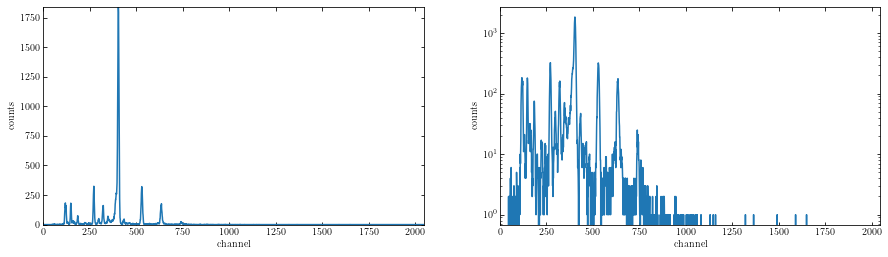

In [17]:
fig,ax = subplots(1,2,figsize=(15,4))
y = data.data[100,101]

ax[0].plot(y)
ax[0].set_xlim(0,2048)
ax[0].set_ylim(0,y.max())
ax[0].set_xlabel('channel')
ax[0].set_ylabel('counts')

ax[1].semilogy(y)
ax[1].set_xlim(0,2048)
ax[1].set_xlabel('channel')
ax[1].set_ylabel('counts')

Text(0, 0.5, 'counts')

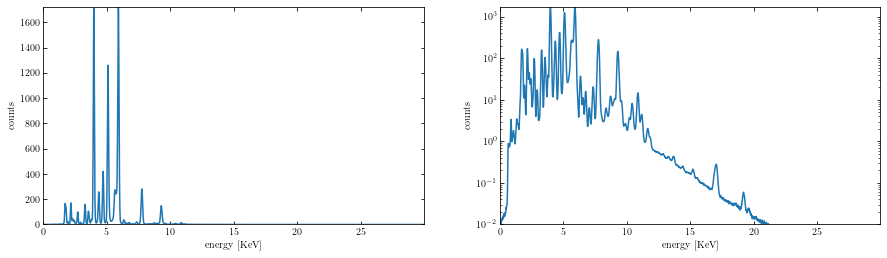

In [18]:
fig,ax = subplots(1,2,figsize=(15,4))
y = data.data.mean(0).mean(0)
x = data.x

ax[0].plot(x,y)
ax[0].set_xlim(0,x.max())
ax[0].set_ylim(0,y.max())
ax[0].set_xlabel('energy [KeV]')
ax[0].set_ylabel('counts')

ax[1].semilogy(x,y)
ax[1].set_xlim(0,x.max())
ax[1].set_ylim(1e-2,y.max())
ax[1].set_xlabel('energy [KeV]')
ax[1].set_ylabel('counts')

In [326]:
from scipy.interpolate import interp1d
from numpy import concatenate,append,array,diff,trapz

In [332]:
def resample(x,y,nbins=1024,bounds=(0,30)):
    
    f = interp1d(x,y,fill_value='extrapolate')
    
    new_x = linspace(*bounds,nbins)
    new_y = f(new_x)
    
    ax = new_x[0]
    ay = new_y[0]
    
    ix = []
    iy = []

    for bx,by in zip(new_x[1:],new_y[1:]):
        f = (x > ax) & (x < bx)

        gx = array([ax,*x[f],bx])
        gy = array([ay,*y[f],by])

        ix += [(ax + bx) * 0.5]
        iy += [trapz(gy,gx)]

        ax = bx
        ay = by
        
    ix = array(ix)
    iy = array(iy)
               
    return ix,iy

In [333]:
x = data.x
y = data.data.mean(0).mean(0)

In [334]:
%%timeit
ix,iy = resample(x,y,512)

19.4 ms ± 30.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [335]:
for n in [64,128,256,512,1024,2048,4096,8192]:
    ix,iy = resample(x,y,n)
    print(sum(iy))

905.0002701547053
905.0002701547048
905.0002701547046
905.0002701547061
905.0002701547047
905.000270154704
905.0002701547061
905.0002701547044


(0.0, 2000.0)

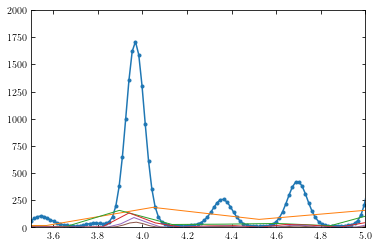

In [336]:
plot(x,y,'.-')

plot(*resample(x,y,64),'-',lw=1)
plot(*resample(x,y,128),'-',lw=1)
plot(*resample(x,y,256),'-',lw=1)
plot(*resample(x,y,512),'-',lw=1)
plot(*resample(x,y,1024),'-',lw=1)

#xlim(5.6,6.2)
xlim(3.5,5)
ylim(0,2000)